In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [15]:
path = "./data/competitor_market_prices_power.csv"

In [16]:
pd.read_csv(path, nrows=10)

,date_valid_from,date_valid_to,rank,consumption_range_kwh,tariff,supplier,price_year_eur,post_code,city,energy
0,2022-02-19,2022-02-20,22,2400,Nidorina,Solanus,1061.77,41751,Viersen,power
1,2022-02-19,2022-02-20,20,1200,Togepi,Norte,651.44,22159,Hamburg,power
2,2022-02-19,2022-02-20,31,3600,Grookey,Purga,1562.37,31137,Hildesheim,power
3,2022-02-19,2022-02-20,40,3600,Jirachi,Elvegust,1609.43,78054,Villingen-Schwenningen,power
4,2022-02-19,2022-02-20,15,7800,Magneton,Paramitos,3040.72,48161,Münster,power
5,2022-02-19,2022-02-20,14,9000,Tornadus,Bergwind,3558.20,27578,Bremerhaven,power
6,2022-02-19,2022-02-20,26,5500,Appletun,Helm,2203.24,78054,Villingen-Schwenningen,power
7,2022-02-19,2022-02-20,35,7500,Marshtomp,Favonius,3319.41,30419,Hannover,power
8,2022-02-19,2022-02-20,22,2000,Tsareena,Bergwind,902.32,85055,Ingolstadt,power
9,2022-02-19,2022-02-20,22,250,Wimpod,Wambra,234.19,14480,Potsdam,power


In [7]:
dtypes = {"date_valid_from": pd.to_datetime(), "date_valid_to": pd.to_datetime(), "rank": np.int8, "cunsumption_range_kwh": np.int32, "tariff": str, 
          "supplier":str, "price_year_eur": np.float64, "post_code": str, "city": str, "energy": str}

TypeError: to_datetime() missing 1 required positional argument: 'arg'

In [30]:
household_reader = pd.read_csv(path, chunksize=500000, parse_dates=["date_valid_from", "date_valid_to"])

In [32]:
household_power = pd.DataFrame()
for num, chunk in zip([1,2], household_reader):
    household_power = household_power.join(chunk)
    print(num)

1


ValueError: columns overlap but no suffix specified: Index(['date_valid_from', 'date_valid_to', 'rank', 'consumption_range_kwh',
       'tariff', 'supplier', 'price_year_eur', 'post_code', 'city', 'energy'],
      dtype='object')

In [27]:
household_power.info

<bound method DataFrame.info of Empty DataFrame
Columns: []
Index: []>

In [28]:
household_power.shape

(0, 0)

In [232]:
duplicated = household_power.duplicated()
duplicated.sum()

13718951

In [22]:
household_power.head()

,date_valid_from,date_valid_to,rank,consumption_range_kwh,tariff,supplier,price_year_eur,post_code,city,energy
0,2022-02-19,2022-02-20,22,2400,Nidorina,Solanus,1061.77,41751,Viersen,power
1,2022-02-19,2022-02-20,20,1200,Togepi,Norte,651.44,22159,Hamburg,power
2,2022-02-19,2022-02-20,31,3600,Grookey,Purga,1562.37,31137,Hildesheim,power
3,2022-02-19,2022-02-20,40,3600,Jirachi,Elvegust,1609.43,78054,Villingen-Schwenningen,power
4,2022-02-19,2022-02-20,15,7800,Magneton,Paramitos,3040.72,48161,Münster,power


# Length of supplier data

In [184]:
sliced_power = household_power.loc[(household_power["post_code"]==41751) & (household_power["consumption_range_kwh"]==2400)]

In [188]:
sliced_power.shape

(34320, 10)

In [190]:
suppliers = sliced_power.loc[:,"supplier"].unique()

In [230]:
print(f"There are {suppliers.shape[0]} suppliers")
print()

for sup in suppliers:
    smallest = sliced_power.loc[sliced_power["supplier"]==sup,"date_valid_from"].min()
    biggest = sliced_power.loc[sliced_power["supplier"]==sup,"date_valid_to"].max()
    if biggest == "9999-12-31":
        biggest = "2022-10-16"
    smallest= pd.to_datetime(smallest)
    biggest = pd.to_datetime(biggest)
    print(f"For {sup:<20} we have {(biggest-smallest).days +1:>3} days of data")

There are 99 suppliers

For Solanus              we have 411 days of data
For Collada              we have 181 days of data
For Bhoot                we have 179 days of data
For Nördliche Dwina      we have 216 days of data
For Werra                we have 411 days of data
For Bergwind             we have 411 days of data
For Santa                we have 338 days of data
For Calima               we have  31 days of data
For Lule älv             we have 411 days of data
For Paramitos            we have 262 days of data
For Elvegust             we have 341 days of data
For Poniente             we have 362 days of data
For Boreas               we have 411 days of data
For Norte                we have 301 days of data
For Tornado              we have 338 days of data
For Sarma                we have 411 days of data
For Tehuantepecers       we have 408 days of data
For Monsunwind           we have 136 days of data
For Mureș                we have 250 days of data
For Willy                w

In [156]:
power_plz_range_sort = household_power[(household_power["post_code"]==41751) & (household_power["consumption_range_kwh"]==2400)].sort_values(by = ["date_valid_from", "rank"])


In [157]:
nidorina_plz_range_sort = power_plz_range_sort[power_plz_range_sort["tariff"] == "Nidorina"]

In [159]:
nidorina_plz_range_sort.head()

,date_valid_from,date_valid_to,rank,consumption_range_kwh,tariff,supplier,price_year_eur,post_code,city,energy
14701508,2022-02-08,2022-02-08,21,2400,Nidorina,Solanus,1134.60,41751,Viersen,power
59324226,2022-02-08,2022-02-08,21,2400,Nidorina,Solanus,1134.60,41751,Viersen,power
8235968,2022-02-08,2022-02-08,42,2400,Nidorina,Solanus,1364.24,41751,Viersen,power
67346021,2022-02-08,2022-02-08,42,2400,Nidorina,Solanus,1364.24,41751,Viersen,power
59374860,2022-02-09,2022-02-09,25,2400,Nidorina,Solanus,1141.88,41751,Viersen,power


In [178]:
delta = pd.to_datetime("2022-02-08") - pd.to_datetime("2022-02-05")
delta.days

3

In [162]:
nidorina_plz_range_sort.shape

(58, 10)

In [153]:
nidorina_plz_range_sort.duplicated().head()

14701508    False
59324226     True
8235968     False
67346021     True
59374860    False
dtype: bool

In [163]:
nidorina_plz_range_sort.duplicated().sum()

29

In [104]:
nidorina_plz_range_sort.shape

(58, 10)

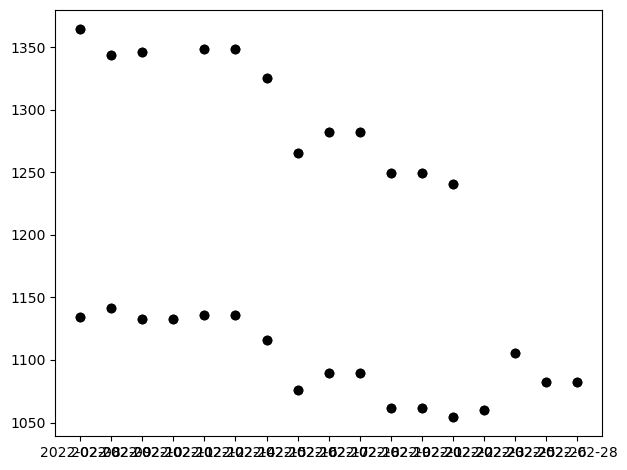

In [231]:
fig = plt.figure()

for from_date, to_date, price in zip(nidorina_plz_range_sort["date_valid_from"], nidorina_plz_range_sort["date_valid_to"], nidorina_plz_range_sort["price_year_eur"]):
    plt.scatter(from_date, price, c = "black")
    #plt.scatter(to_date, price)
    
fig.tight_layout()

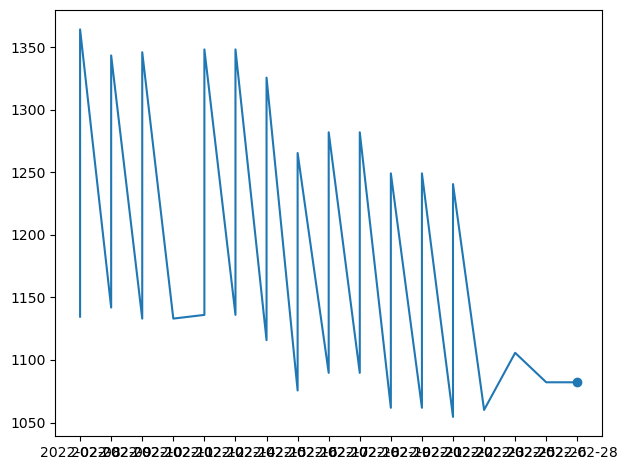

In [164]:
fig = plt.figure()


plt.plot(nidorina_plz_range_sort["date_valid_from"], nidorina_plz_range_sort["price_year_eur"])

    
fig.tight_layout()

In [30]:
solanus=household_power[household_power["supplier"]=="Solanus"]

In [50]:
solanus_plz_range = solanus.query("consumption_range_kwh == 2400 and post_code == 41751 and tariff == 'Snorlax'")

In [51]:
solanus_sort = solanus_plz_range.sort_values(by = ["date_valid_from", "tariff"])

In [52]:
solanus_sort.head()

,date_valid_from,date_valid_to,rank,consumption_range_kwh,tariff,supplier,price_year_eur,post_code,city,energy
30984964,2021-09-01,2021-09-01,44,2400,Snorlax,Solanus,770.85,41751,Viersen,power
63864471,2021-09-01,2021-09-01,44,2400,Snorlax,Solanus,770.85,41751,Viersen,power
65355805,2021-09-04,2021-09-08,46,2400,Snorlax,Solanus,780.07,41751,Viersen,power
65911708,2021-09-04,2021-09-08,45,2400,Snorlax,Solanus,780.07,41751,Viersen,power
55263258,2021-09-09,2021-09-09,41,2400,Snorlax,Solanus,780.07,41751,Viersen,power


In [53]:
solanus_sort.shape

(150, 10)

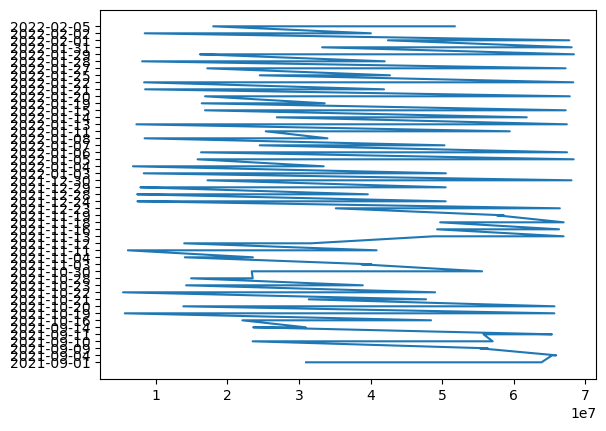

In [54]:
plt.plot(solanus_sort["date_valid_from"])

In [13]:
import pyarrow.feather as feather
household_power.to_feather("feather_competitor_market_price_power")

ModuleNotFoundError: No module named 'pyarrow'